## Introduction

This notebook is for illustrating the examples we used in our paper, for demonstrating the correctness of our math deduction.  

In [118]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)
np.random.seed(3)

Note that we define a function for creating a simulated O/E matrix and transform it into the Pearson matrix.   

In [119]:
def generate_oe_matrix(length:int, variance_threshold_L:int = 0.85, variance_threshold_U:int = 1):
    """
        Generates a random 5x5 symmetric matrix with positive values and
        the first PC explaining at least L% and at most U% of the variance.
    """

    while True:
        # Create a nxn array with random positive values
        matrix = np.abs(np.random.randn(length, length) * 10)  # Use absolute values for positive entries
        # Make the array symmetric
        matrix = matrix + matrix.T
        origin_matrix = matrix.copy()

        # Subtract the mean of each row to center the data (For PCA)
        matrix = matrix - matrix.mean(axis=1, keepdims=True)

        # SVD 
        n = len(matrix[0])
        y = matrix.T / np.sqrt(n)
        U, S, Vh = np.linalg.svd(y, full_matrices=True)
        eigenvalues = S * S
        EV1_explained_variance = eigenvalues[0] / np.sum(eigenvalues) 

        # Check if the first PC explains at least the desired variance
        if EV1_explained_variance >= variance_threshold_L and EV1_explained_variance < variance_threshold_U:
            return origin_matrix

length = 5
# Generate a simulated O/E matrix.
oe = generate_oe_matrix(length=length)
# Calculate the Pearson matrix.
X = np.corrcoef(oe)
# Subtract the mean of each row to center the data
X = X - X.mean(axis=1, keepdims=True)

#### Perform PCA on the Pearson correlation matrix <br>

In [120]:
n = length
y = X.T / np.sqrt(n)

U, S, Vh = np.linalg.svd(y, full_matrices=True)
eigenvalues = S * S
explained_variance_ratios = eigenvalues / np.sum(eigenvalues)
cov_x = np.matmul(y.T, y)
V_Cx = np.matmul(Vh, cov_x)

print('explained variances (lambda)')
print(eigenvalues, '\n')
print('explained variance ratios')
print(explained_variance_ratios, '\n')
print("X")
print(X, '\n')
print("Cx")
print(cov_x, '\n')
print("V")
print(V_Cx, '\n')
print("P transpose")
print(Vh.T, '\n')

explained variances (lambda)
[3.88339 0.01947 0.00332 0.00004 0.     ] 

explained variance ratios
[0.99416 0.00499 0.00085 0.00001 0.     ] 

X
[[ 0.77991  0.6558  -0.89469  0.55151 -1.09253]
 [ 0.70952  0.83362 -1.06346  0.6733  -1.15298]
 [-0.56208 -0.78457  1.11252 -0.80992  1.04405]
 [ 0.61689  0.68497 -1.07715  0.84529 -1.07001]
 [-0.70387 -0.81804  1.10009 -0.74674  1.16856]] 

Cx
[[ 0.66732  0.7365  -0.70711  0.70585 -0.75164]
 [ 0.7365   0.8224  -0.79701  0.79141 -0.84027]
 [-0.70711 -0.79701  0.78303 -0.77685  0.81723]
 [ 0.70585  0.79141 -0.77685  0.77388 -0.81222]
 [-0.75164 -0.84027  0.81723 -0.81222  0.85959]] 

V
[[-1.5971  -1.78503  1.73771 -1.72817  1.82687]
 [ 0.01396  0.00426  0.01008 -0.008   -0.00079]
 [ 0.00125 -0.00178  0.00087  0.00226  0.00066]
 [ 0.00001 -0.00001 -0.00002 -0.00001  0.00002]
 [ 0.       0.      -0.       0.      -0.     ]] 

P transpose
[[-0.41126  0.71687  0.3762   0.40859  0.09208]
 [-0.45966  0.21873 -0.53669 -0.20806 -0.63996]
 [ 0.44747  0

In [121]:
print('V_Cx[0]')
print(V_Cx[0], '\n')
print('Vh[0]')
print(Vh[0], '\n')

V_Cx[0]
[-1.5971  -1.78503  1.73771 -1.72817  1.82687] 

Vh[0]
[-0.41126 -0.45966  0.44747 -0.44501  0.47043] 



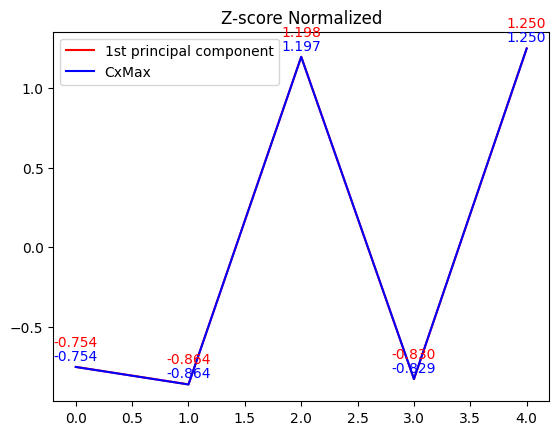

In [122]:
cov_x_sum = [np.sum(np.abs(row)) for row in cov_x]
cov_x_sum = list(enumerate(cov_x_sum)) 
sorted_list = sorted(cov_x_sum, key=lambda x: x[1], reverse=True) 
cov_x_selected = cov_x[sorted_list[0][0]]

if np.corrcoef(cov_x_selected, Vh[0])[0][1] < 0:
    cov_x_selected = -cov_x_selected

Vh0_Norm = (Vh[0] - np.mean(Vh[0])) / np.std(Vh[0])
cov_x_selected_Norm = (cov_x_selected - np.mean(cov_x_selected)) / np.std(cov_x_selected)

plt.plot(Vh0_Norm, c="red")
plt.plot(cov_x_selected_Norm, c="blue")

plt.title("Z-score Normalized")
plt.legend(["1st principal component", "CxMax"])

# zip joins x and y coordinates in pairs
# https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
Vh0_Norm_xs = np.arange(0, length, 1)
for x, y in zip(Vh0_Norm_xs, Vh0_Norm):
    label = "{:.3f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 15), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='red'
    ) 

cov_x_selected_Norm_xs = np.arange(0, length, 1)
for x, y in zip(cov_x_selected_Norm_xs, cov_x_selected_Norm):
    label = "{:.3f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 5), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='blue'
    ) 

In [123]:
plt.close('all')

### Check the plot without Normalization on the Pearson correlation matrix

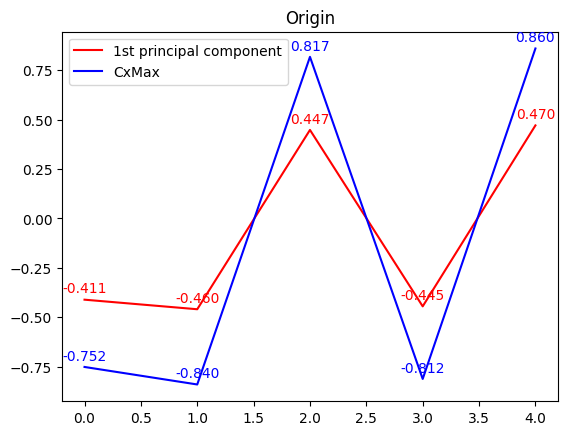

In [124]:
plt.plot(Vh[0], c="red")
plt.plot(cov_x_selected, c="blue")

plt.title("Origin")
plt.legend(["1st principal component", "CxMax"])

# zip joins x and y coordinates in pairs
# https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
Vh0_xs = np.arange(0, length, 1)
for x, y in zip(Vh0_xs, Vh[0]):
    label = "{:.3f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 5), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='red'
    ) 

cov_x_selected_xs = np.arange(0, length, 1)
for x, y in zip(cov_x_selected_xs, cov_x_selected):
    label = "{:.3f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 5), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='blue'
    ) 

In [125]:
print("The first row of V")
print(V_Cx[0], '\n')
print("Corresponding entry of V:")
print(np.dot(Vh[0], cov_x_selected))

The first row of V
[-1.5971  -1.78503  1.73771 -1.72817  1.82687] 

Corresponding entry of V:
1.8268746094481316


In [126]:
plt.close('all')